In [1]:
from PIL import Image

In [2]:
import json

In [69]:
from tqdm import tqdm

In [57]:
with open("../data/robo/test/_annotations.createml.json") as f:
    annotations = json.load(f)

In [58]:
annotations

[{'image': '654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg',
  'annotations': [{'label': 'black-knight',
    'coordinates': {'x': 220.5, 'y': 142, 'width': 22, 'height': 54.5}}]},
 {'image': 'IMG_0170_JPG.rf.480e7164cb4727f6654402882f0ce942.jpg',
  'annotations': [{'label': 'black-bishop',
    'coordinates': {'x': 295, 'y': 254.5, 'width': 22, 'height': 56}},
   {'label': 'white-pawn',
    'coordinates': {'x': 186, 'y': 305, 'width': 20.5, 'height': 43.5}},
   {'label': 'black-queen',
    'coordinates': {'x': 325.5, 'y': 122.5, 'width': 29, 'height': 65}},
   {'label': 'black-king',
    'coordinates': {'x': 330.5, 'y': 155, 'width': 28.5, 'height': 79}},
   {'label': 'black-bishop',
    'coordinates': {'x': 312.5, 'y': 88, 'width': 20, 'height': 55.5}},
   {'label': 'black-rook',
    'coordinates': {'x': 349.5, 'y': 305.5, 'width': 30, 'height': 55}},
   {'label': 'black-rook',
    'coordinates': {'x': 307.5, 'y': 27, 'width': 21, 'height': 48}},
   {'labe

In [70]:
def extract_images(directory):
    full_path = f"../data/robo/{directory}"
    with open(f"{full_path}/_annotations.createml.json") as f:
        annotations = json.load(f)
    for image in tqdm(annotations):
        print("Extracting", image)
        uid = 0
        fn = image["image"]
        for label in image['annotations']:
            coord = label["coordinates"]
            bbox = (coord["x"], coord["y"], coord["width"], coord["height"])
            img = modify_image(f"{full_path}/{fn}", 90, 180, crop=bbox)
            img.save(f"data/{fn}-{label['label']}-{uid}.jpg", "JPEG")
            uid += 1

In [55]:
def modify_image(img_path, ds_w, ds_h, crop=None):
    img = Image.open(img_path)
    if crop is not None:
        x, y, w, h = crop
        img = img.crop((x - w/2, y - h/2, x + w/2, y + h/2))
    else:
        w, h = img.size
    if w / h < ds_w / ds_h:
        # Height is limiting factor, pad width
        new_height = ds_h
        new_width = round(w * ds_h / h)
    else:
        new_width = ds_w
        new_height = round(h * ds_w / w)
    result = Image.new(img.mode, (ds_w, ds_h), (0, 0, 0))
    result.paste(img.resize((new_width, new_height), Image.ANTIALIAS),
                 (round(ds_w / 2 - new_width / 2), round(ds_h / 2 - new_height / 2)))
    return result

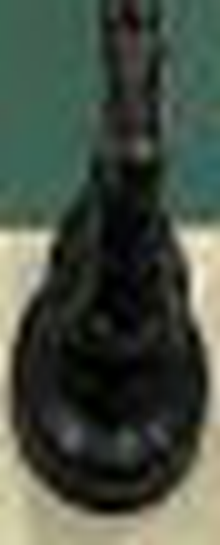

In [56]:
modify_image("../data/robo/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg", 220, 545, crop=(220.5, 145, 22, 54.5))

In [ ]:
extract_images("train")

  0%|                                           | 1/606 [00:00<01:23,  7.23it/s]

Extracting {'image': '1877a28e4c5f5c1ea68aca66f4e85d95_jpg.rf.c65abe6a33f5679f8c1e84d9029a77e4.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 339.1618538510553, 'y': 120.94344960805809, 'width': 30.285433609163192, 'height': 68.01492441538241}}, {'label': 'black-king', 'coordinates': {'x': 340.78950014004454, 'y': 152.97835973791453, 'width': 31.454156384465023, 'height': 82.53237948031062}}, {'label': 'black-bishop', 'coordinates': {'x': 305.5328063653834, 'y': 260.3848875303551, 'width': 24.20398123487962, 'height': 60.9101940258131}}, {'label': 'black-bishop', 'coordinates': {'x': 326.0982058561459, 'y': 83.20780623152714, 'width': 22.686527154676014, 'height': 59.38401142842079}}, {'label': 'white-rook', 'coordinates': {'x': 360.93354961172554, 'y': 312.8623711663353, 'width': 32.70398123487962, 'height': 61.05856207770296}}, {'label': 'white-rook', 'coordinates': {'x': 321.76146090388374, 'y': 26.120530906886064, 'width': 21.971260165497938, 'height': 40.87528

  1%|▍                                          | 6/606 [00:00<00:38, 15.51it/s]

Extracting {'image': 'ef1d425fd5370fbf8b7adea43b755304_jpg.rf.c511c91a1669993209db75e7013631ba.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 340.56721233077565, 'y': 300.899454807588, 'width': 34.71672466607242, 'height': 59.576017142631144}}, {'label': 'black-king', 'coordinates': {'x': 331.078754753462, 'y': 197.6176431191907, 'width': 35.98779591439313, 'height': 86.0847446750953}}, {'label': 'black-pawn', 'coordinates': {'x': 215.68528320932154, 'y': 24.22097844304089, 'width': 20.294817756613952, 'height': 44.831646233636135}}, {'label': 'black-knight', 'coordinates': {'x': 177.69899034064485, 'y': 161.8144506506003, 'width': 29.702176151953154, 'height': 58.9887418179901}}, {'label': 'white-king', 'coordinates': {'x': 105.47541210891077, 'y': 153.57994285789607, 'width': 33.987795914393104, 'height': 86.04983454523887}}, {'label': 'white-queen', 'coordinates': {'x': 145.46471106902032, 'y': 118.89919532569559, 'width': 30.284116716723474, 'height': 78.9887418

  3%|█▏                                        | 17/606 [00:00<00:20, 29.11it/s]

Extracting {'image': 'IMG_0317_JPG.rf.c4575757a6e19ad9fb88d28b1a15193e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 187.24692440322343, 'y': 41.31823997454662, 'width': 19.282164745831324, 'height': 48.72108501591261}}]}
Extracting {'image': '673bcd0d44f495fbe9dd88d5cacfceb3_jpg.rf.c3db2d6f80603a8fdd150776e4a74da0.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 216.75802577991783, 'y': 25.5, 'width': 23.98394844016434, 'height': 51}}]}
Extracting {'image': 'e79deba8fe520409790b601ad61da4ee_jpg.rf.c5ace9198f249698fecd9cd44699ad3e.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 200.1108721301503, 'y': 99.19514286641606, 'width': 18.238531022249163, 'height': 41.5237465082933}}]}
Extracting {'image': '446e75de1ffefc2115e79696bcf0e357_jpg.rf.c74c5023e09478494c8b41aa67f070fe.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 59.91406600780431, 'y': 328.32510889879313, 'width': 33.80834497998063, 'height': 53.3898

  3%|█▍                                        | 20/606 [00:00<00:21, 27.06it/s]

Extracting {'image': 'ce54969567273b9b8a275812ff56e16c_jpg.rf.c314f1d0e3f3e5009805961ff05a7934.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 160.96471106902032, 'y': 118.62864181930821, 'width': 34.71137414612724, 'height': 76.56728961016708}}, {'label': 'black-knight', 'coordinates': {'x': 226.14079628416783, 'y': 162.96788000158173, 'width': 32.24582169431096, 'height': 60.532379480310624}}, {'label': 'white-bishop', 'coordinates': {'x': 225.15300036977473, 'y': 248.44169740418943, 'width': 31.362209807265003, 'height': 64.51492441538244}}, {'label': 'white-queen', 'coordinates': {'x': 261.9647110690203, 'y': 116.86568026155823, 'width': 30.667728603769433, 'height': 74.9974693504542}}, {'label': 'white-knight', 'coordinates': {'x': 341.2111944262518, 'y': 244.41690987251616, 'width': 34.00769494845758, 'height': 69.55856207770296}}, {'label': 'white-king', 'coordinates': {'x': 301.5045091371493, 'y': 149.1587501319654, 'width': 35.929601857916055, 'height': 84.

In [67]:
classes = set(l["label"] for im in annotations for l in im["annotations"])

In [68]:
classes

{'black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook'}

[{'id': 0,
  'image_id': 0,
  'category_id': 8,
  'bbox': [172, 221, 25, 58.5],
  'area': 1462.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 41,
  'image_id': 2,
  'category_id': 8,
  'bbox': [56, 175, 21, 55.5],
  'area': 1165.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 42,
  'image_id': 2,
  'category_id': 8,
  'bbox': [70, 58, 20, 56],
  'area': 1120,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 52,
  'image_id': 3,
  'category_id': 8,
  'bbox': [136, 148, 25, 61],
  'area': 1525,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 54,
  'image_id': 3,
  'category_id': 8,
  'bbox': [65, 33, 24, 59],
  'area': 1416,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 79,
  'image_id': 5,
  'category_id': 8,
  'bbox': [204, 7, 19, 55.5],
  'area': 1054.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 100,
  'image_id': 7,
  'category_id': 8,
  'bbox': [70, 57, 20.5, 55],
  'area': 1127.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 101,
  'image_id': 7,
  'category_id': 8,
  'bb

{'info': {'year': '2021',
  'version': '24',
  'description': 'Exported from roboflow.ai',
  'contributor': 'Roboflow',
  'url': 'https://public.roboflow.ai/object-detection/chess-full',
  'date_created': '2021-02-23T17:32:58+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/publicdomain/zero/1.0/',
   'name': 'Public Domain'}],
 'categories': [{'id': 0, 'name': 'pieces', 'supercategory': 'none'},
  {'id': 1, 'name': 'bishop', 'supercategory': 'pieces'},
  {'id': 2, 'name': 'black-bishop', 'supercategory': 'pieces'},
  {'id': 3, 'name': 'black-king', 'supercategory': 'pieces'},
  {'id': 4, 'name': 'black-knight', 'supercategory': 'pieces'},
  {'id': 5, 'name': 'black-pawn', 'supercategory': 'pieces'},
  {'id': 6, 'name': 'black-queen', 'supercategory': 'pieces'},
  {'id': 7, 'name': 'black-rook', 'supercategory': 'pieces'},
  {'id': 8, 'name': 'white-bishop', 'supercategory': 'pieces'},
  {'id': 9, 'name': 'white-king', 'supercategory': 'pieces'},
  {'id': 10, 'na